# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 636
['saint-pierre', 'namibe', 'rikitea', 'fomboni', 'high prairie', 'kharan', 'matara', 'provideniya', 'mataura', 'busselton', 'manta', 'waw', 'pacific grove', 'bredasdorp', 'saint-philippe', 'skibbereen', 'carnarvon', 'yanam', 'belushya guba', 'georgetown', 'puerto real', 'butaritari', 'manono', 'ahipara', 'kaitangata', 'hilo', 'san patricio', 'vao', 'shelburne', 'snezhnogorsk', 'narsaq', 'amapa', 'neiafu', 'port alfred', 'batesville', 'atuona', 'new norfolk', 'lebu', 'promyshlennaya', 'bereznik', 'saldanha', 'mar del plata', 'pilao arcado', 'alekseyevskaya', 'aquiraz', 'cabadiangan', 'bud', 'asau', 'nanortalik', 'zhob', 'chapais', 'vaini', 'taolanaro', 'ekhabi', 'aksu', 'pahalgam', 'ariquemes', 'puerto ayora', 'rochester', 'tasiilaq', 'chokurdakh', 'fairbanks', 'mogok', 'jamestown', 'ushuaia', 'killin', 'vaitupu', 'kanchanaburi', 'isangel', 'traverse city', 'stephenville', 'west odessa', 'leh', 'laylay', 'norman wells', 'sault sainte marie', 'luderitz',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL and API key
url = "https://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&units=imperial&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | fomboni
Processing Record 5 of Set 1 | high prairie
Processing Record 6 of Set 1 | kharan
Processing Record 7 of Set 1 | matara
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | manta
Processing Record 12 of Set 1 | waw
Processing Record 13 of Set 1 | pacific grove
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | skibbereen
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | yanam
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | puerto real
Processing Record 22 of Set 1 | butaritari

Processing Record 42 of Set 4 | mareeba
Processing Record 43 of Set 4 | dikson
Processing Record 44 of Set 4 | sonoita
Processing Record 45 of Set 4 | surskoye
Processing Record 46 of Set 4 | drayton valley
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | wukari
Processing Record 49 of Set 4 | victor harbor
Processing Record 0 of Set 5 | strezhevoy
Processing Record 1 of Set 5 | richards bay
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | los llanos de aridane
Processing Record 5 of Set 5 | nishihara
Processing Record 6 of Set 5 | tirur
Processing Record 7 of Set 5 | lasa
Processing Record 8 of Set 5 | coihaique
Processing Record 9 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 10 of Set 5 | panchagarh
Processing Record 11 of Set 5 | ponta do sol
Processing Record 12 of Set 5 | albany
Processing Record 13 of Set 5 | cozumel
Processing Record 14 of Set 5 | san policarpo
Processing Record 15 o

Processing Record 29 of Set 8 | pringsewu
Processing Record 30 of Set 8 | obeliai
Processing Record 31 of Set 8 | ulaanbaatar
Processing Record 32 of Set 8 | madaripur
Processing Record 33 of Set 8 | kargasok
Processing Record 34 of Set 8 | ayr
Processing Record 35 of Set 8 | norden
Processing Record 36 of Set 8 | bandarbeyla
Processing Record 37 of Set 8 | bundaberg
Processing Record 38 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 39 of Set 8 | dunedin
Processing Record 40 of Set 8 | barrhead
Processing Record 41 of Set 8 | saint peters
Processing Record 42 of Set 8 | cabo san lucas
Processing Record 43 of Set 8 | port macquarie
Processing Record 44 of Set 8 | aklavik
Processing Record 45 of Set 8 | falealupo
City not found. Skipping...
Processing Record 46 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 47 of Set 8 | caravelas
Processing Record 48 of Set 8 | marawi
Processing Record 49 of Set 8 | mildura
Processing Record 0 of Set 9 | pointe-no

Processing Record 16 of Set 12 | champerico
Processing Record 17 of Set 12 | cachira
Processing Record 18 of Set 12 | kihei
Processing Record 19 of Set 12 | moron
Processing Record 20 of Set 12 | temozon
Processing Record 21 of Set 12 | neuquen
Processing Record 22 of Set 12 | esna
Processing Record 23 of Set 12 | kenai
Processing Record 24 of Set 12 | la ronge
Processing Record 25 of Set 12 | ayagoz
Processing Record 26 of Set 12 | lorengau
Processing Record 27 of Set 12 | camana
Processing Record 28 of Set 12 | revda
Processing Record 29 of Set 12 | crucea
Processing Record 30 of Set 12 | pacifica
Processing Record 31 of Set 12 | jabinyanah
Processing Record 32 of Set 12 | qostanay
Processing Record 33 of Set 12 | ayorou
Processing Record 34 of Set 12 | lagoa
Processing Record 35 of Set 12 | uyuni
Processing Record 36 of Set 12 | hailey
Processing Record 37 of Set 12 | wroclaw
Processing Record 38 of Set 12 | mukhen
Processing Record 39 of Set 12 | chilmari
Processing Record 40 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())


City          590
Latitude      590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-pierre,-21.3393,55.4781,75.56,78,0,5.75,RE,1681681946
1,namibe,-15.1961,12.1522,75.60,77,12,3.09,AO,1681681947
2,rikitea,-23.1203,-134.9692,80.11,80,5,15.01,PF,1681681947
3,fomboni,-12.2800,43.7425,82.18,76,100,7.83,KM,1681681947
4,high prairie,55.4334,-116.4858,60.17,30,23,13.35,CA,1681681804


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,75.56,78,0,5.75,RE,1681681946
1,namibe,-15.1961,12.1522,75.60,77,12,3.09,AO,1681681947
2,rikitea,-23.1203,-134.9692,80.11,80,5,15.01,PF,1681681947
3,fomboni,-12.2800,43.7425,82.18,76,100,7.83,KM,1681681947
4,high prairie,55.4334,-116.4858,60.17,30,23,13.35,CA,1681681804


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

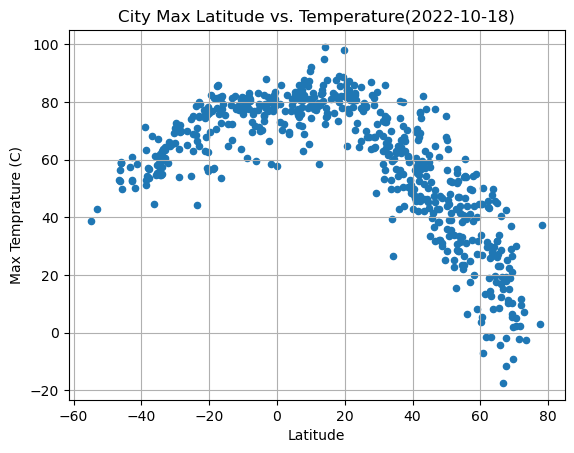

In [8]:
# Build scatter plot for latitude vs. temperature
lat_temp_df = city_data_df[["Latitude", "Max Temp"]].astype(float)
lat_temp_df.plot(
    kind="scatter", 
    x="Latitude", 
    y="Max Temp",


# Incorporate the other graph properties
    title="City Max Latitude vs. Temperature(2022-10-18)",
    ylabel="Max Temprature (C)",
    grid=True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

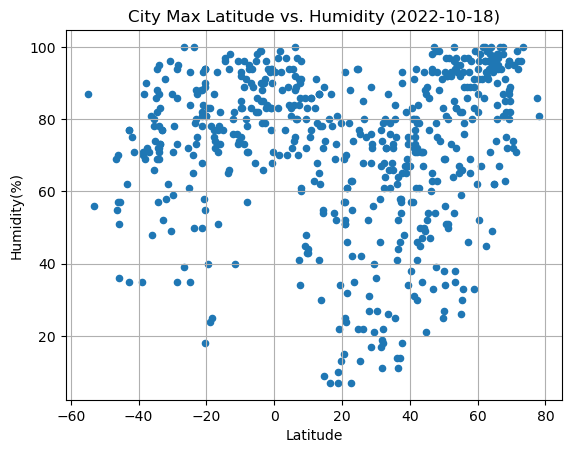

In [9]:
# Build the scatter plots for latitude vs. humidity

lat_hum_df = city_data_df[["Latitude","Humidity"]].astype(float)
lat_hum_df.plot(
    kind="scatter", 
    x="Latitude", 
    y="Humidity",

# Incorporate the other graph properties
    title="City Max Latitude vs. Humidity (2022-10-18)",
    ylabel="Humidity(%)",
    grid=True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

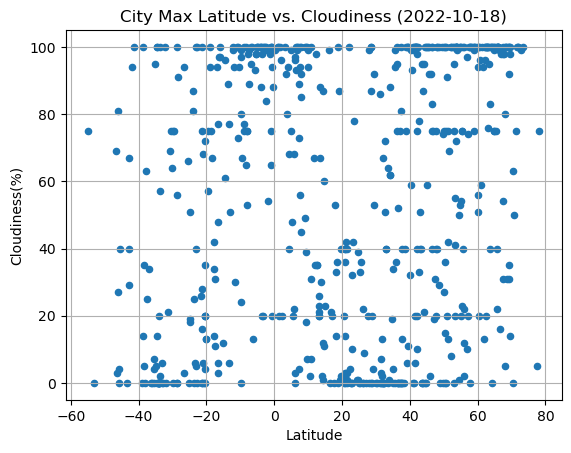

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud_df = city_data_df[["Latitude","Cloudiness"]].astype(float)
lat_cloud_df.plot(
    kind="scatter", 
    x="Latitude", 
    y="Cloudiness",

# Incorporate the other graph properties
    title="City Max Latitude vs. Cloudiness (2022-10-18)",
    ylabel="Cloudiness(%)",
    grid=True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

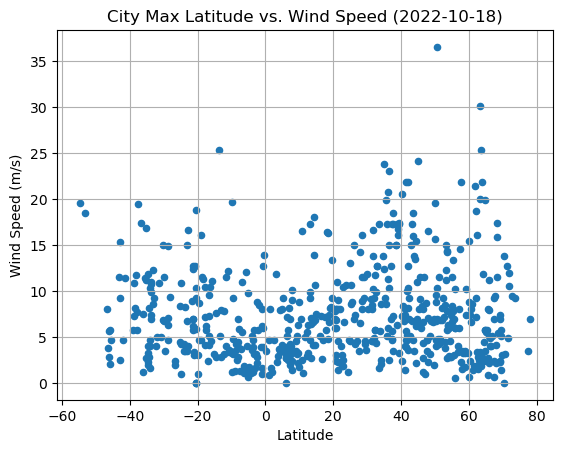

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_df = city_data_df[["Latitude","Wind Speed"]].astype(float)
lat_wind_df.plot(
    kind="scatter", 
    x="Latitude", 
    y="Wind Speed",

# Incorporate the other graph properties
    title="City Max Latitude vs. Wind Speed (2022-10-18)",
    ylabel="Wind Speed (m/s)",
    grid=True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Latitude"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,high prairie,55.4334,-116.4858,60.17,30,23,13.35,CA,1681681804
5,kharan,28.5833,65.4167,81.36,17,87,8.93,PK,1681681948
6,matara,5.9485,80.5353,77.14,84,22,3.20,LK,1681681949
7,provideniya,64.3833,-173.3000,19.51,49,0,4.47,RU,1681681949
11,waw,7.7029,27.9953,86.32,34,94,3.18,SS,1681681950


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Latitude"]<0),:]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,75.56,78,0,5.75,RE,1681681946
1,namibe,-15.1961,12.1522,75.60,77,12,3.09,AO,1681681947
2,rikitea,-23.1203,-134.9692,80.11,80,5,15.01,PF,1681681947
3,fomboni,-12.2800,43.7425,82.18,76,100,7.83,KM,1681681947
8,mataura,-46.1927,168.8643,52.48,57,27,2.80,NZ,1681681949


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7324978252655414


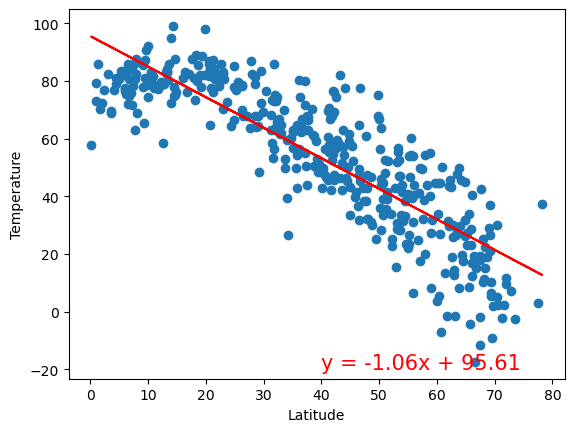

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression (x_values=northern_hemi_df["Latitude"], y_values=northern_hemi_df["Max Temp"],title="Temperature",text_coordinates=(40,-20))
    

The r-value is: 0.5613165396188111


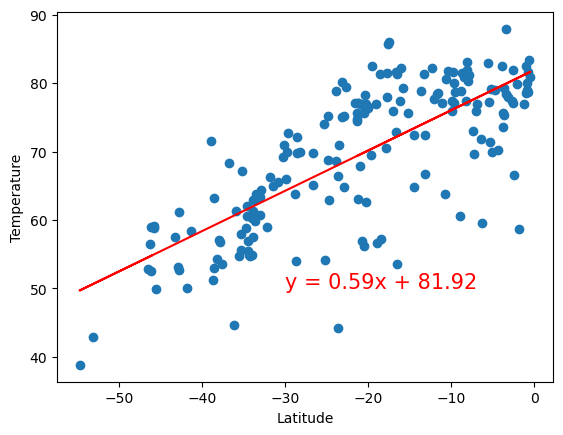

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression (x_values=southern_hemi_df["Latitude"], y_values=southern_hemi_df["Max Temp"],title="Temperature",text_coordinates=(-30,50))
    

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06433145976408745


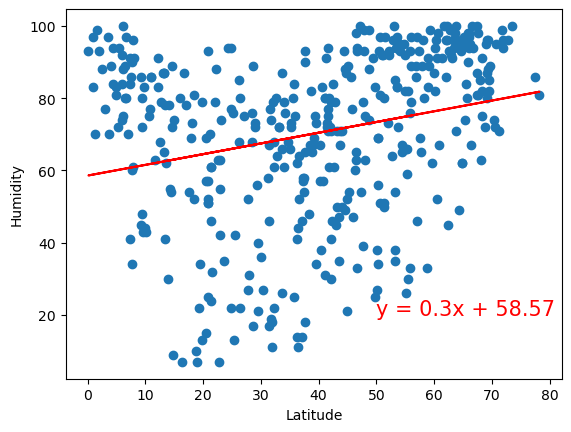

In [17]:
# Northern Hemisphere
plot_linear_regression (x_values=northern_hemi_df["Latitude"], y_values=northern_hemi_df["Humidity"],title="Humidity",text_coordinates=(50,20))
    

The r-value is: 0.12308582283090212


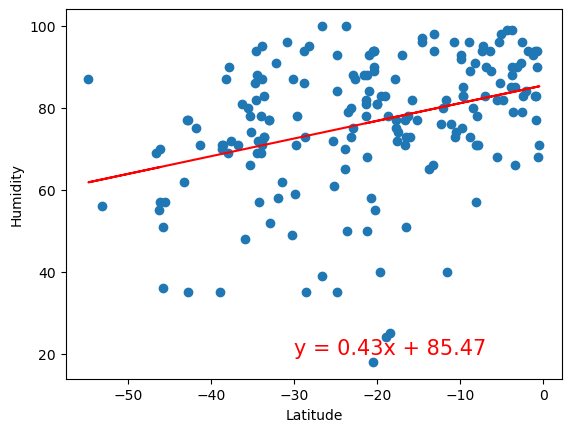

In [18]:
# Southern Hemisphere
plot_linear_regression (x_values=southern_hemi_df["Latitude"], y_values=southern_hemi_df["Humidity"],title="Humidity",text_coordinates=(-30,20))
    

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06102967342656746


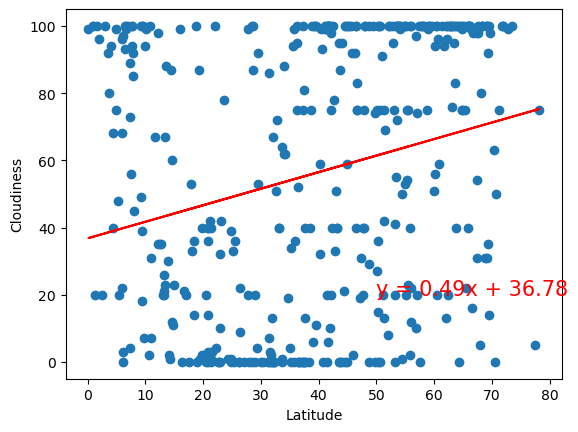

In [19]:
# Northern Hemisphere
plot_linear_regression (x_values=northern_hemi_df["Latitude"], y_values=northern_hemi_df["Cloudiness"],title="Cloudiness",text_coordinates=(50,20))
    

The r-value is: 0.2284872677970661


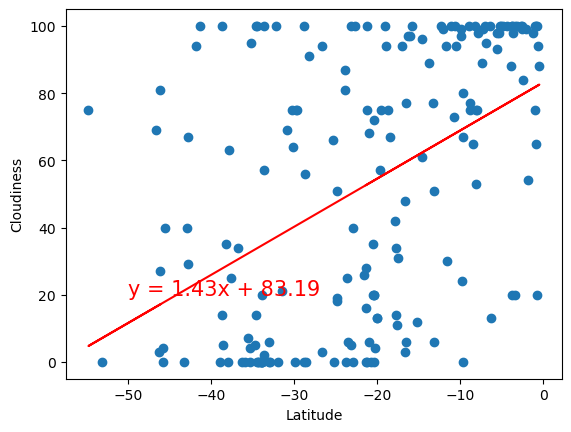

In [20]:
# Southern Hemisphere
plot_linear_regression (x_values=southern_hemi_df["Latitude"], y_values=southern_hemi_df["Cloudiness"],title="Cloudiness",text_coordinates=(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009198582478714402


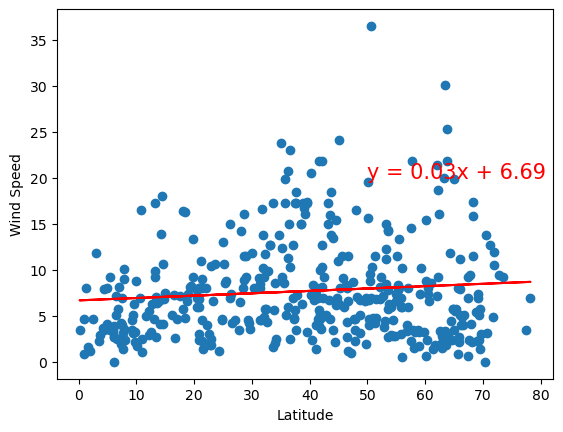

In [21]:
# Northern Hemisphere
plot_linear_regression (x_values=northern_hemi_df["Latitude"], y_values=northern_hemi_df["Wind Speed"],title="Wind Speed",text_coordinates=(50,20))

The r-value is: 0.06838787924920108


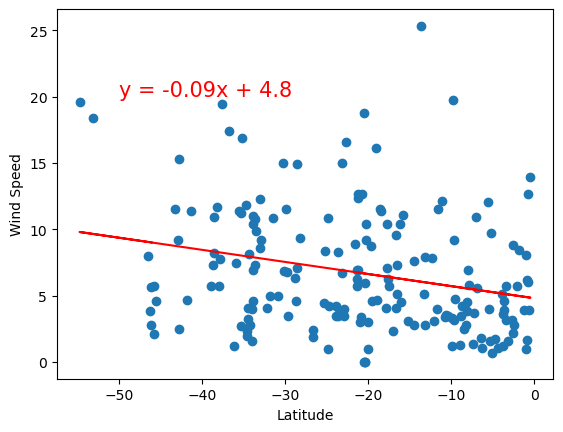

In [23]:
# Southern Hemisphere
plot_linear_regression (x_values=southern_hemi_df["Latitude"], y_values=southern_hemi_df["Wind Speed"],title="Wind Speed",text_coordinates=(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Temperature vs Latitude Linear Relationship
For the Nother hemisphere, the Temperature vs Latitude relationship is negative. Per one item increase in latitude, the temperature decreases (-1,06). It's the opposite for the southern hemisphere, where with the increase in latitude, the temperature increases on 0.59
    
Humidity vs. Latitude Linear Relationship
In both hemispheres, the humidity increases with latitude increase. The positive slope in the southern hemisphere is higher than in the northern hemisphere.

Cloudiness vs. Latitude Linear Relationship
On both hemispheres, the cloudiness increases with latitude increase. The positive slope in the southern hemisphere is three times higher than in the northern hemisphere.

Wind Speed vs. Latitude Linear Relationship
For the northern hemisphere, the relationship is positive. Per one item increase in latitude, the wind speed is increasing to 0,03. It's the opposite for the southern hemisphere, where with the increase in latitude, the wind speed decreases on 0.09